In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as patches

In [51]:
def velo_plot(hist, i, ax=None):
    
    text_size = 18
    if ax is None:
        plt.figure(figsize=([6,3]), dpi=300)
        ax = plt.subplot()

    color1 = "tab:orange"
    color2 = "k"

    ax.plot(hist[:,0], hist[:,1], linewidth=3, color=color1, label = r'v$_{\text{calc}}$')
    ax.plot(hist[:,0], hist[:,2], "--", color=color2, label = r'v$_{\text{theo}}$')
    ax.legend(frameon=False, fontsize = text_size)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_xlabel(r"Velocity [$\frac{\text{m}}{\text{s}}$]", fontsize = text_size)
    ax.set_ylabel(r"Relative number of particles [-]", fontsize = text_size)
    ax.tick_params(direction="in", which="both", top=True, right=True)
    ax.grid(True, which="minor", alpha=0.2)
    ax.xaxis.set_minor_locator(MultipleLocator(50))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlim([min(hist[:,0]), max(hist[:,0])])
    title = "Iteration " + str(i)
    ax.set_title(title, fontsize = text_size)

<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_18172\1740419693.py:11: SyntaxWarning: invalid escape sequence '\w'
  file = "zad" + str(zad) + podp + "\wyniki\hist_" + str(i) + ".dat"


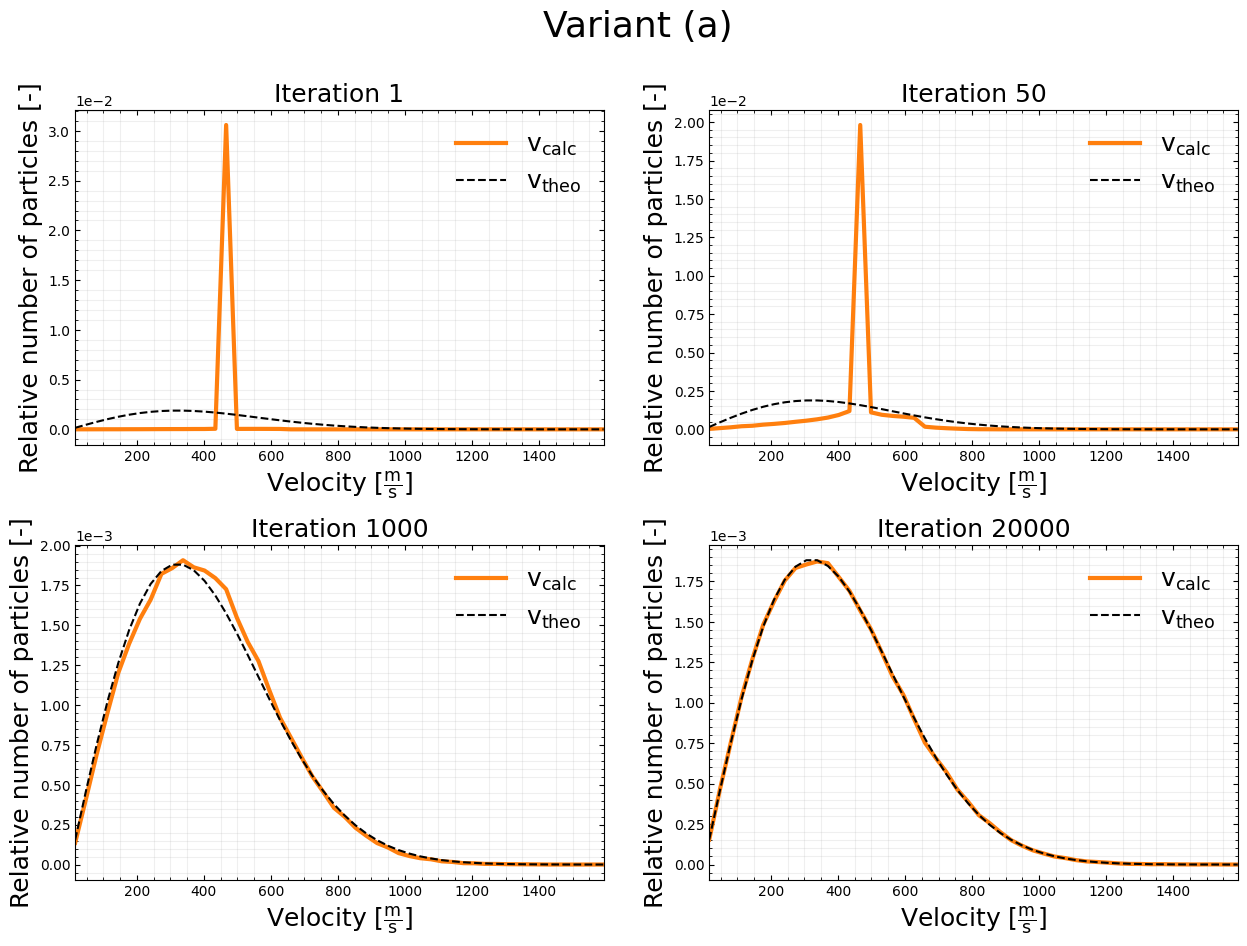

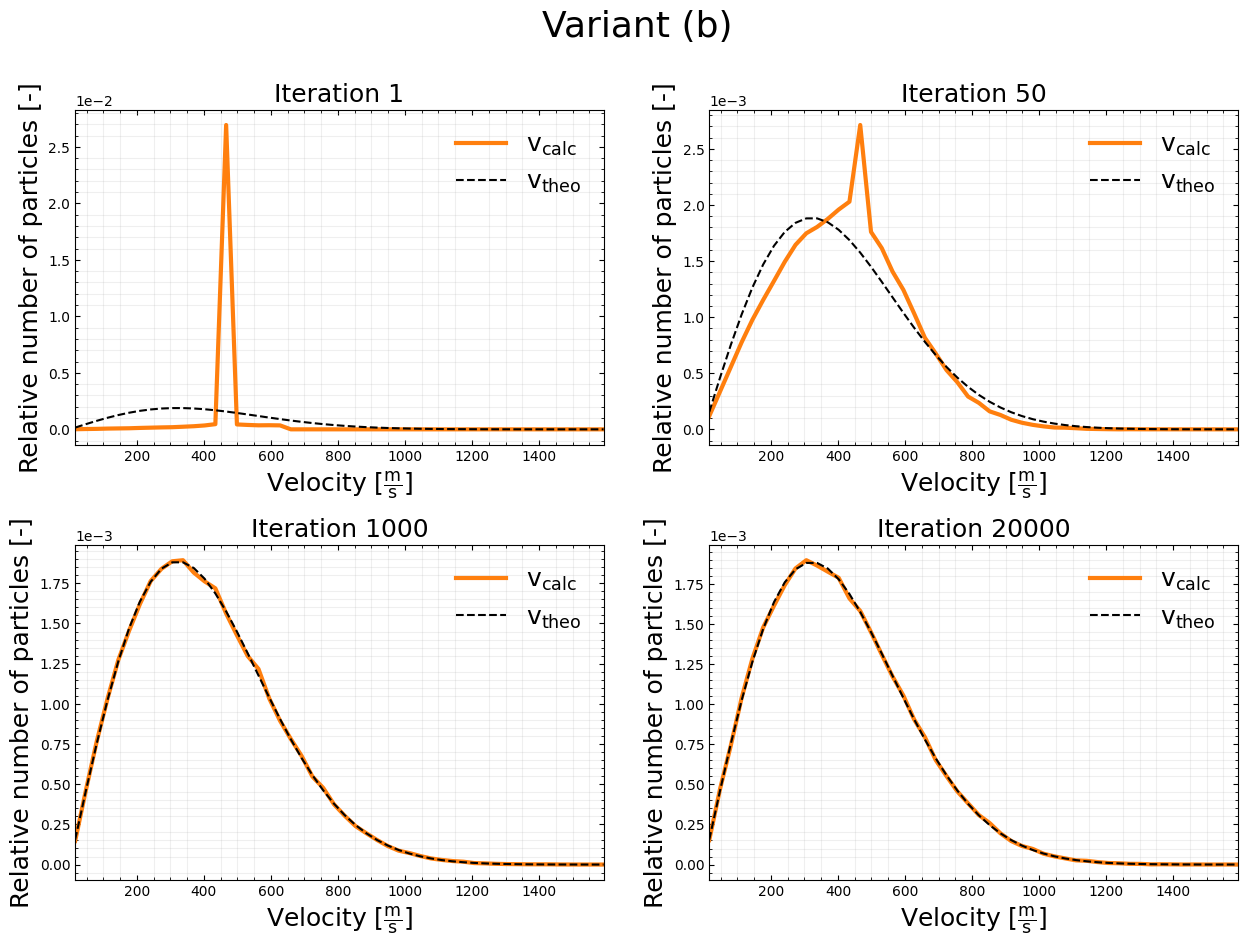

In [69]:
for zad in [1]:
    for podp in ["a", "b"]:
        j=1
        fig, axs = plt.subplots(2, 2, figsize=([15,10]))
        title = "Variant (" + podp + ")"
        fig.suptitle(title, fontsize = 26)
        its=[1, 50, 1000, 20000]
        for a in range(4):
            i = its[a]
            ax = axs[a//2, a%2]
            file = "zad" + str(zad) + podp + "\wyniki\hist_" + str(i) + ".dat"
            hist = np.loadtxt(file, dtype=float)
            graph = velo_plot(hist, i, ax=ax)
            j += 1
        plt.subplots_adjust(hspace=0.3, wspace=0.2)
        name = "zad-" + str(zad) + "_var-" + str(podp) + ".png"
        plt.savefig(name, dpi=300)
        plt.show()

In [63]:
def pos_plot(position, i, ax=None):
    if ax is None:
        plt.figure(figsize=([4,4]), dpi=300)
        ax = plt.subplot()
    text_size = 18
    ax.plot(position[:,0], position[:,1], "o", markersize=4, color="tab:orange", markeredgecolor="k")
    ax.set_xlabel(r"x [m]", fontsize = text_size)
    ax.set_ylabel(r"y [m]", fontsize = text_size)
    ax.tick_params(direction="in", which="both", top=True, right=True)
    ax.xaxis.set_minor_locator(MultipleLocator(0.05))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    rect = patches.Rectangle((0, 1), 1, -1, linewidth=8, edgecolor='tab:purple', facecolor='none')
    ax.add_patch(rect)
    title = "Iteration " + str(i)
    ax.set_title(title, fontsize = text_size)

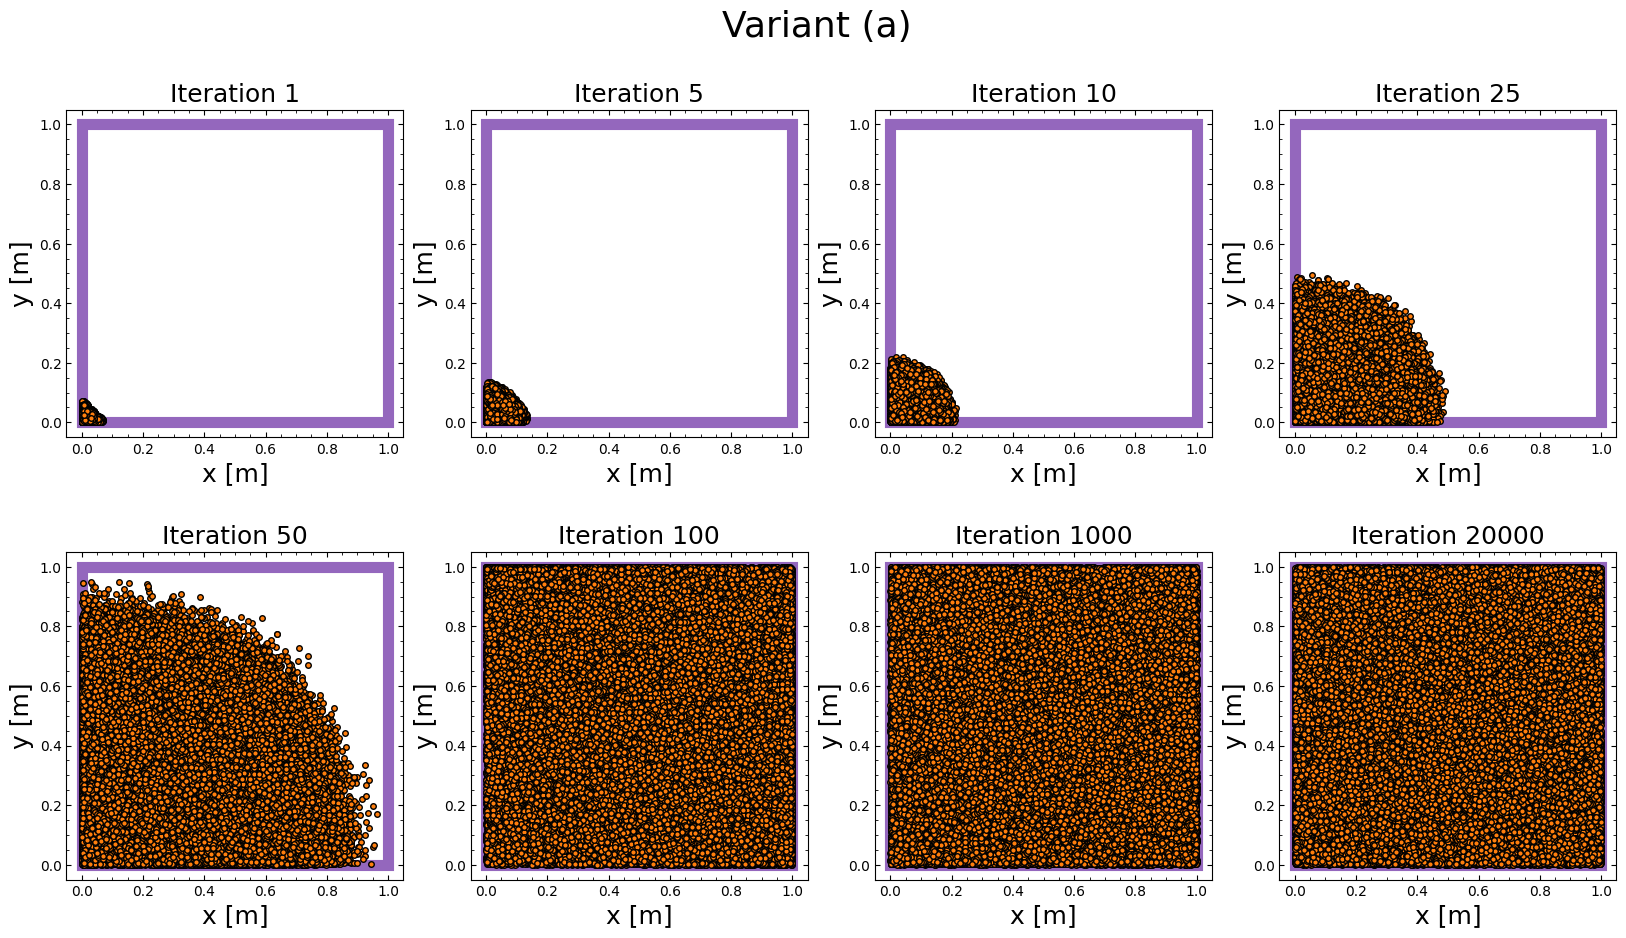

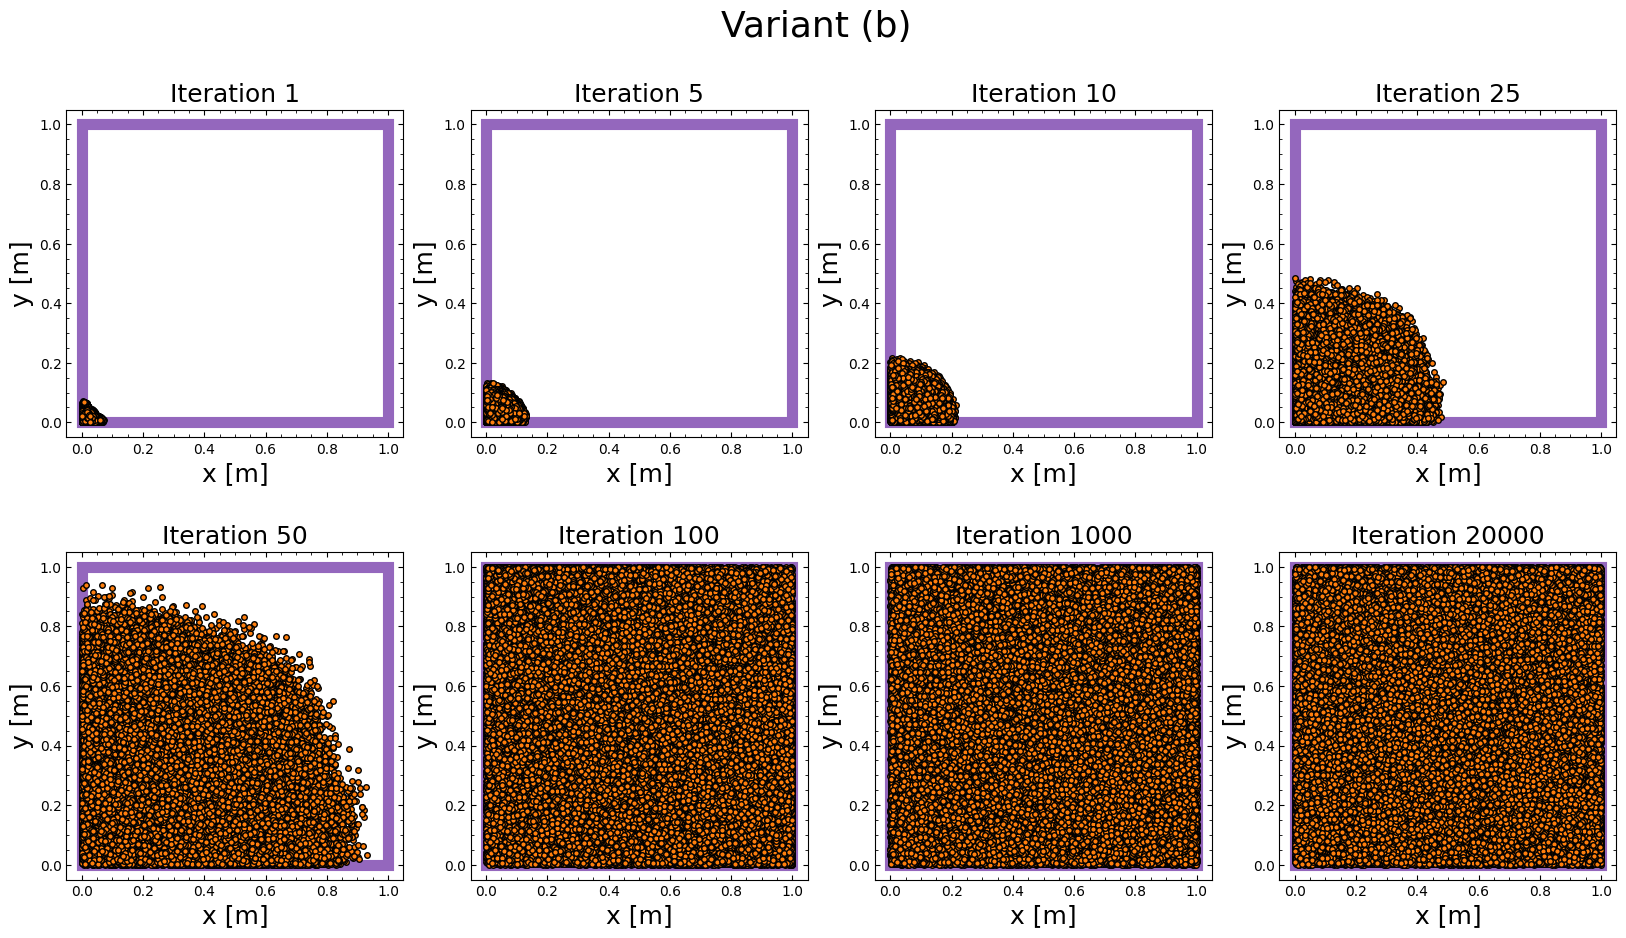

In [68]:
iter = [1, 5, 10, 25, 50, 100, 1000, 20000]
ax_num_2 = [0,1,2,3,0,1,2,3]
ax_num_1 = [0,0,0,0,1,1,1,1]
for folder in [2]:
    for podp in ["a", "b"]:
        fig, axs = plt.subplots(2, 4, figsize=([20,10]))
        for i in range(8):
            ax = axs[ax_num_1[i], ax_num_2[i]]
            file = "zad" + str(folder) + podp + "/wyniki/rv_" + str(iter[i]) + ".dat"
            position = np.loadtxt(file, dtype=float)
            pos_plot(position, iter[i], ax=ax)
        title = "Variant (" + podp + ")"
        fig.suptitle(title, fontsize = 26)
        plt.subplots_adjust(hspace=0.35, wspace=0.2)
        name = "zad-" + str(zad) + "_var-" + str(podp) + ".png"
        plt.savefig(name, dpi=300)
        plt.show()

In [111]:
def t_p_plot(x, temp, pres, i, ax1 = None):
    text_size = 18
    if ax1 is None:
        plt.figure(figsize=([6,3]), dpi=300)
        ax1 = plt.subplot()
    color = 'red'
    ax1.set_xlabel('Distance x [m]', fontsize = text_size)
    ax1.set_ylabel('Temperature [K]', color=color, fontsize = text_size)
    ax1.plot(x, temp, color=color)
    ax1.tick_params(axis='y', labelcolor=color, direction="in", which="both")
    ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    ax1.yaxis.set_major_locator(plt.MaxNLocator(9))

    ax1.tick_params(axis='x', direction="in", top=True, which="both")
    ax1.xaxis.set_minor_locator(MultipleLocator(0.05))
    ax1.set_xlim([min(x), max(x)])
    ax1.grid(True, which="minor", alpha=0.2)
    title = "Iteration " + str(i)
    ax1.set_title(title, fontsize = text_size)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    color = 'purple'
    ax2.set_ylabel('Pressure [Pa]', color=color, fontsize = text_size)  # we already handled the x-label with ax1
    ax2.plot(x, pres, color=color)
    ax2.tick_params(axis='y', labelcolor=color, direction="in", which="both")
    ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax2.yaxis.set_major_locator(plt.MaxNLocator(9))

    # fig.tight_layout()  # otherwise the right y-label is slightly clipped

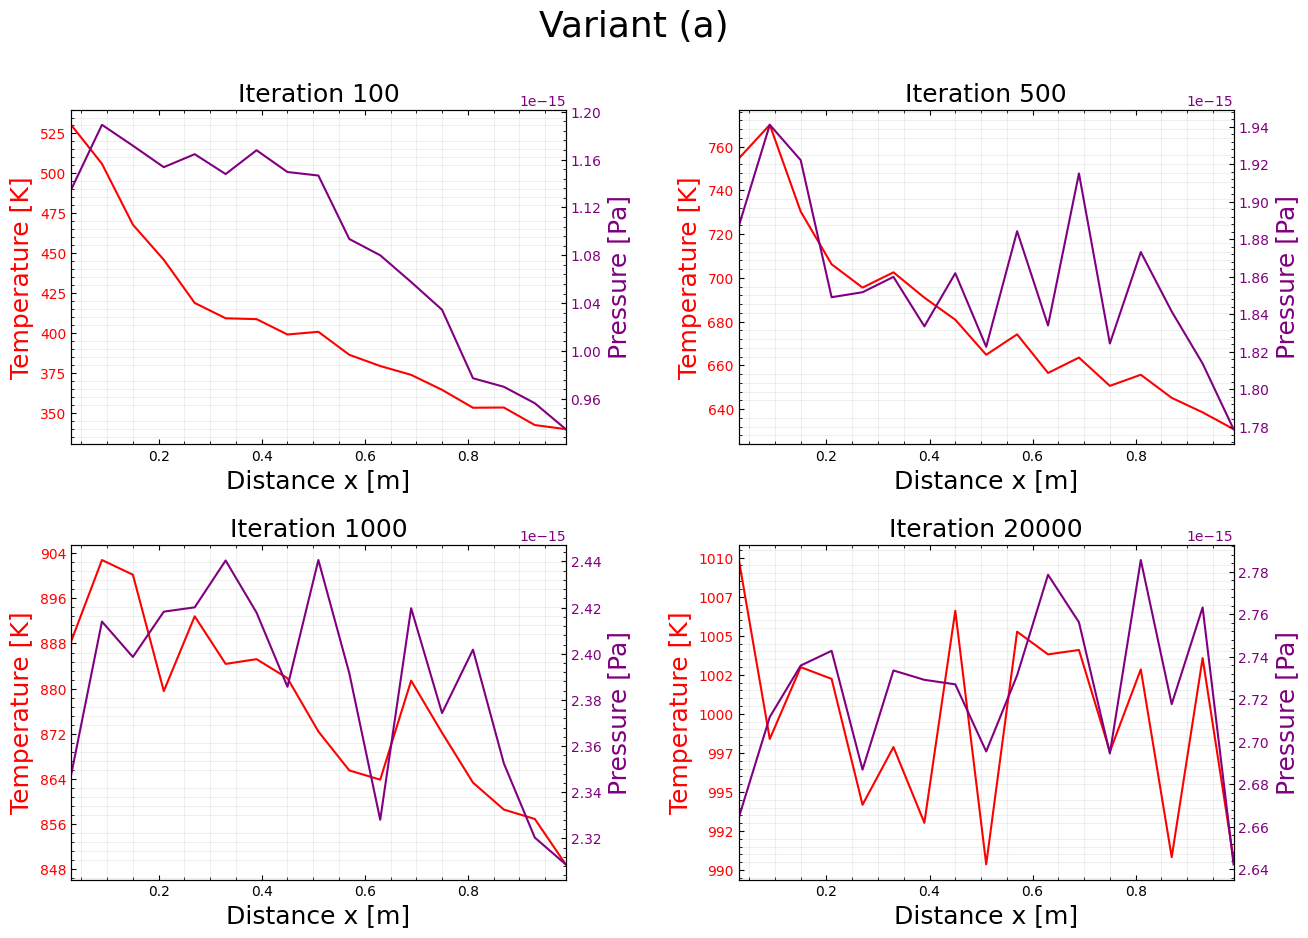

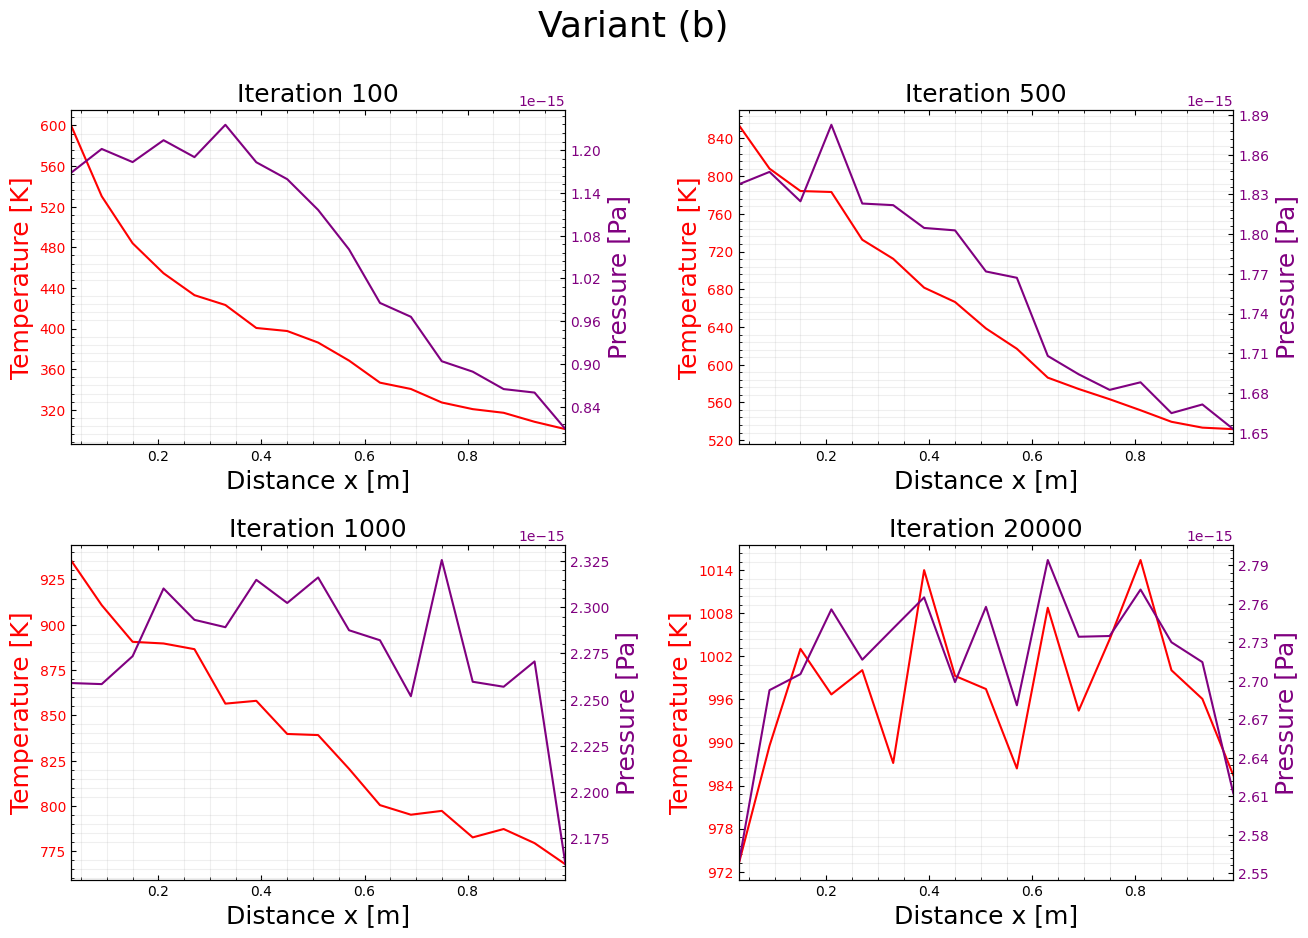

In [112]:
for zad in [3]:
    for podp in ["a", "b"]:
        j=1
        fig, axs = plt.subplots(2, 2, figsize=([15,10]))
        title = "Variant (" + podp + ")"
        fig.suptitle(title, fontsize = 26)
        its=[100, 500, 1000, 20000]
        for a in range(4):
            i = its[a]
            ax = axs[a//2, a%2]
            file = "zad" + str(zad) + podp + "/wyniki/nptv_" + str(i) + ".dat"
            nptv = np.loadtxt(file, dtype=float)
            x = nptv[:,0]
            pres = nptv[:,2]
            temp = nptv[:,3]
            graph = t_p_plot(x, temp, pres, i, ax)
            j += 1
        plt.subplots_adjust(hspace=0.3, wspace=0.35)
        name = "zad-" + str(zad) + "_var-" + str(podp) + ".png"
        plt.savefig(name, dpi=300)
        plt.show()

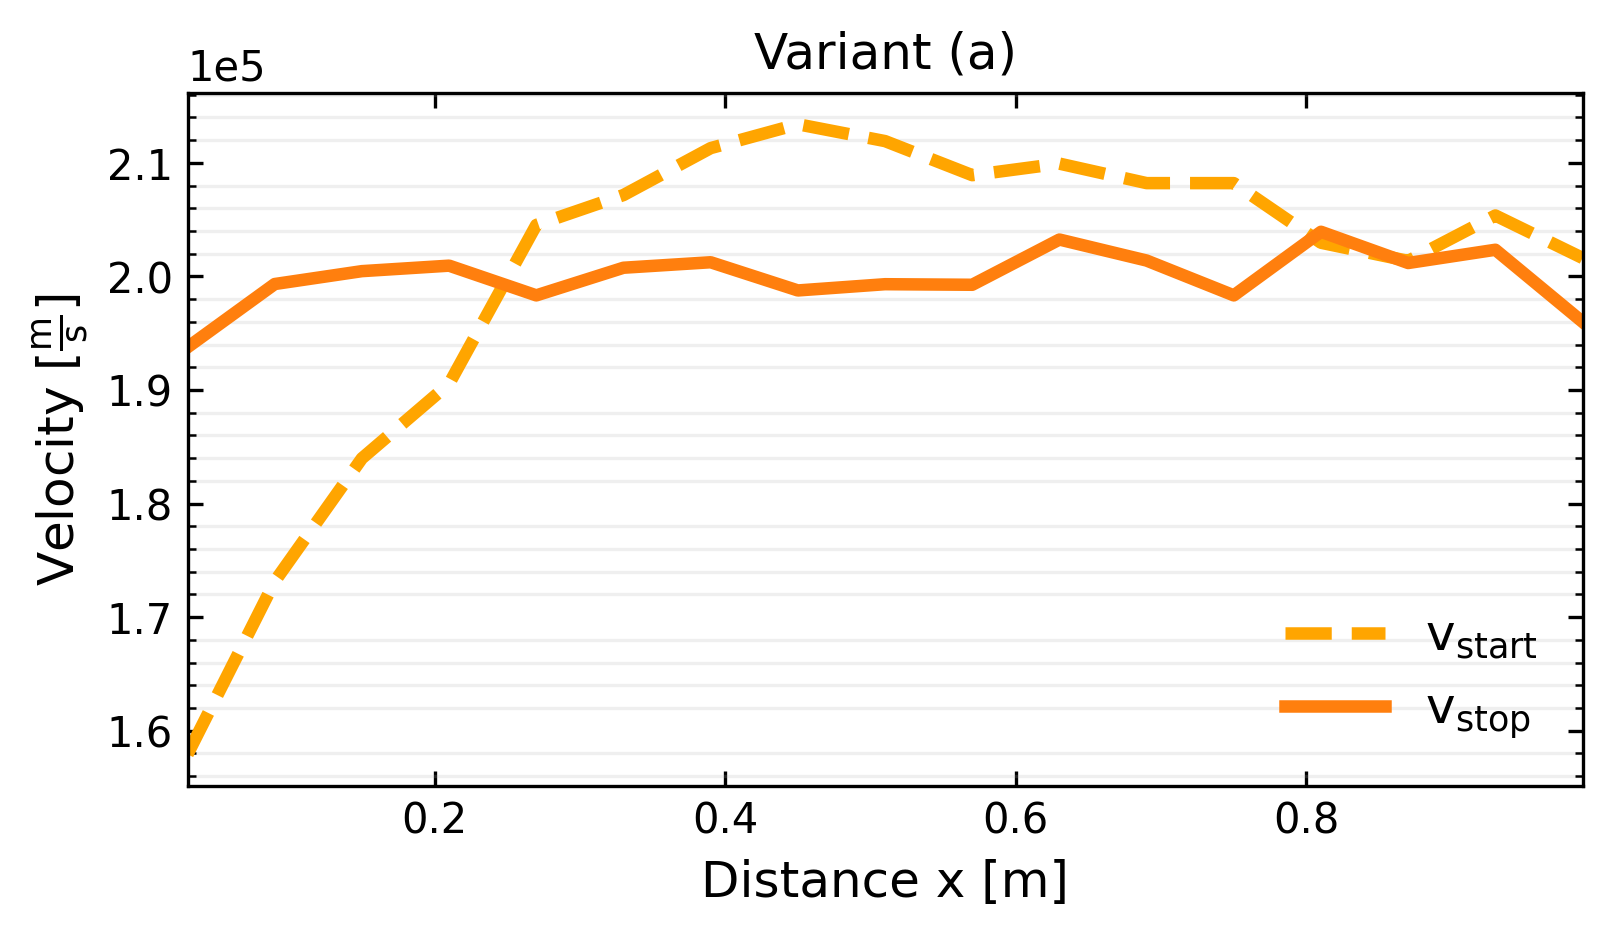

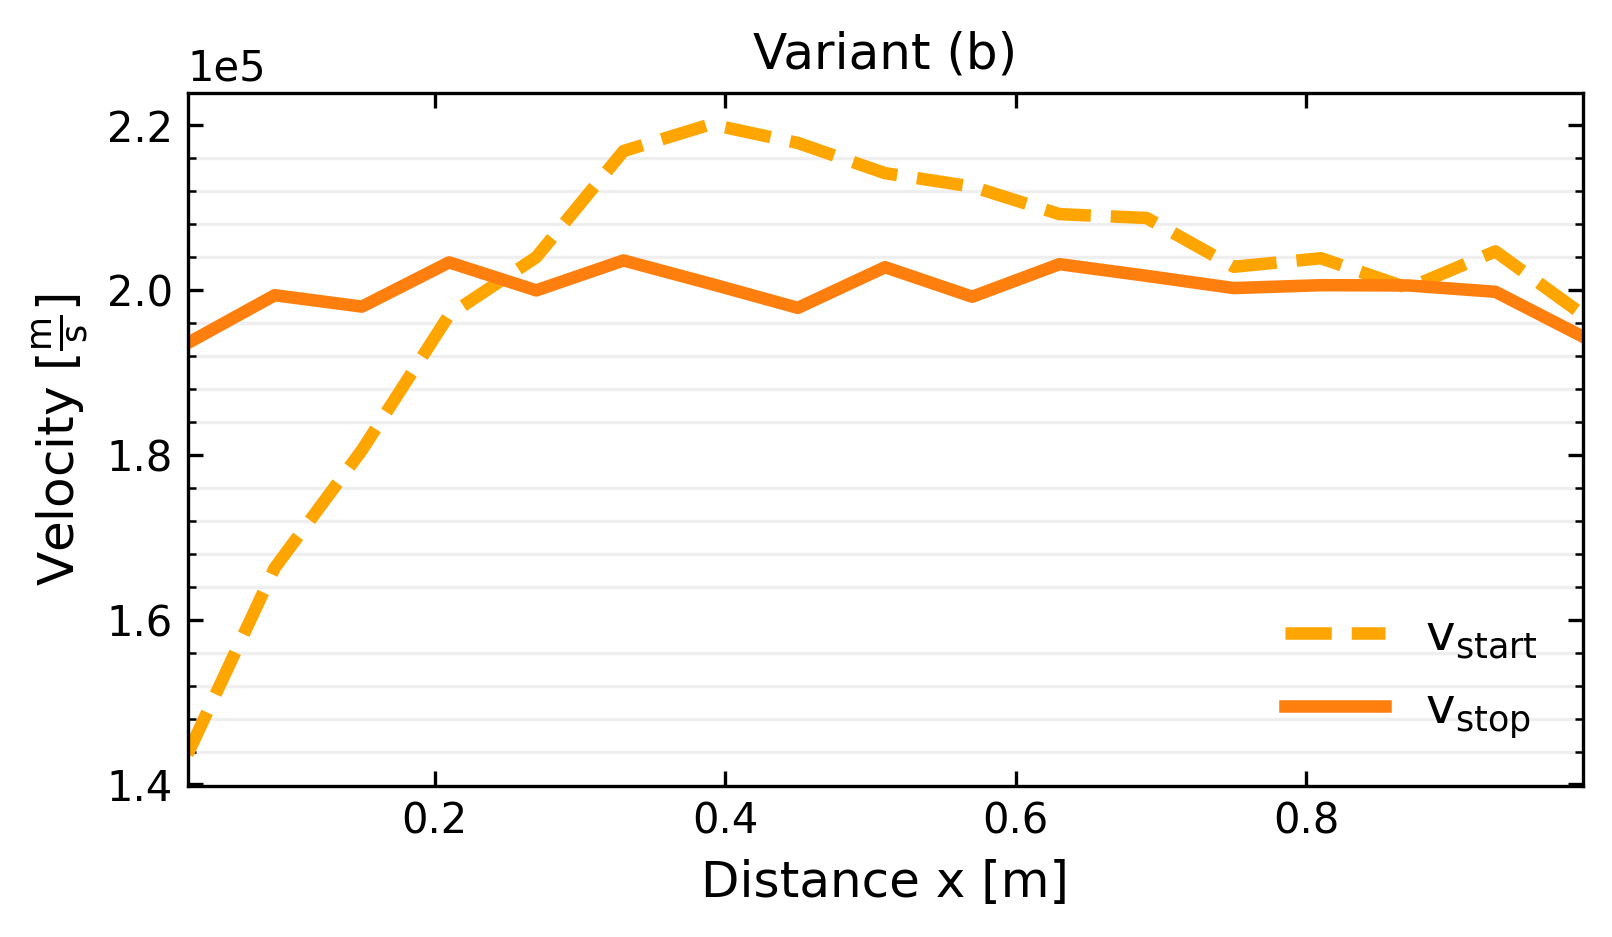

In [126]:
for zad in [3]:
    for podp in ["a", "b"]:
        file = "zad" + str(zad) + podp + "/wyniki/nptv_" + str(100) + ".dat"
        nptv = np.loadtxt(file, dtype=float)
        x = nptv[:,0]
        v0 = nptv[:,1]
        file = "zad" + str(zad) + podp + "/wyniki/nptv_" + str(20000) + ".dat"
        nptv = np.loadtxt(file, dtype=float)
        vk= nptv[:,1]

        text_size = 12
        plt.figure(figsize=([6,3]), dpi=300)
        ax = plt.subplot()

        color1 = "orange"
        color2 = "tab:orange"

        ax.plot(x, v0, "--", linewidth=3, color=color1, label = r'v$_{\text{start}}$')
        ax.plot(x, vk, linewidth=3, color=color2, label = r'v$_{\text{stop}}$')
        ax.legend(frameon=False, fontsize = text_size)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.set_xlabel(r"Distance x [m]", fontsize = text_size)
        ax.set_ylabel(r"Velocity [$\frac{\text{m}}{\text{s}}$]", fontsize = text_size)
        ax.tick_params(direction="in", which="both", top=True, right=True)
        ax.grid(True, which="minor", alpha=0.2)
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.set_xlim([min(hist[:,0]), max(hist[:,0])])
        title = "Variant (" + podp + ")"
        ax.set_title(title, fontsize = text_size)
        # name = "zad-" + str(zad) + "_var-" + str(podp) + "_velo.png"
        # plt.savefig(name, dpi=300)
        plt.show()

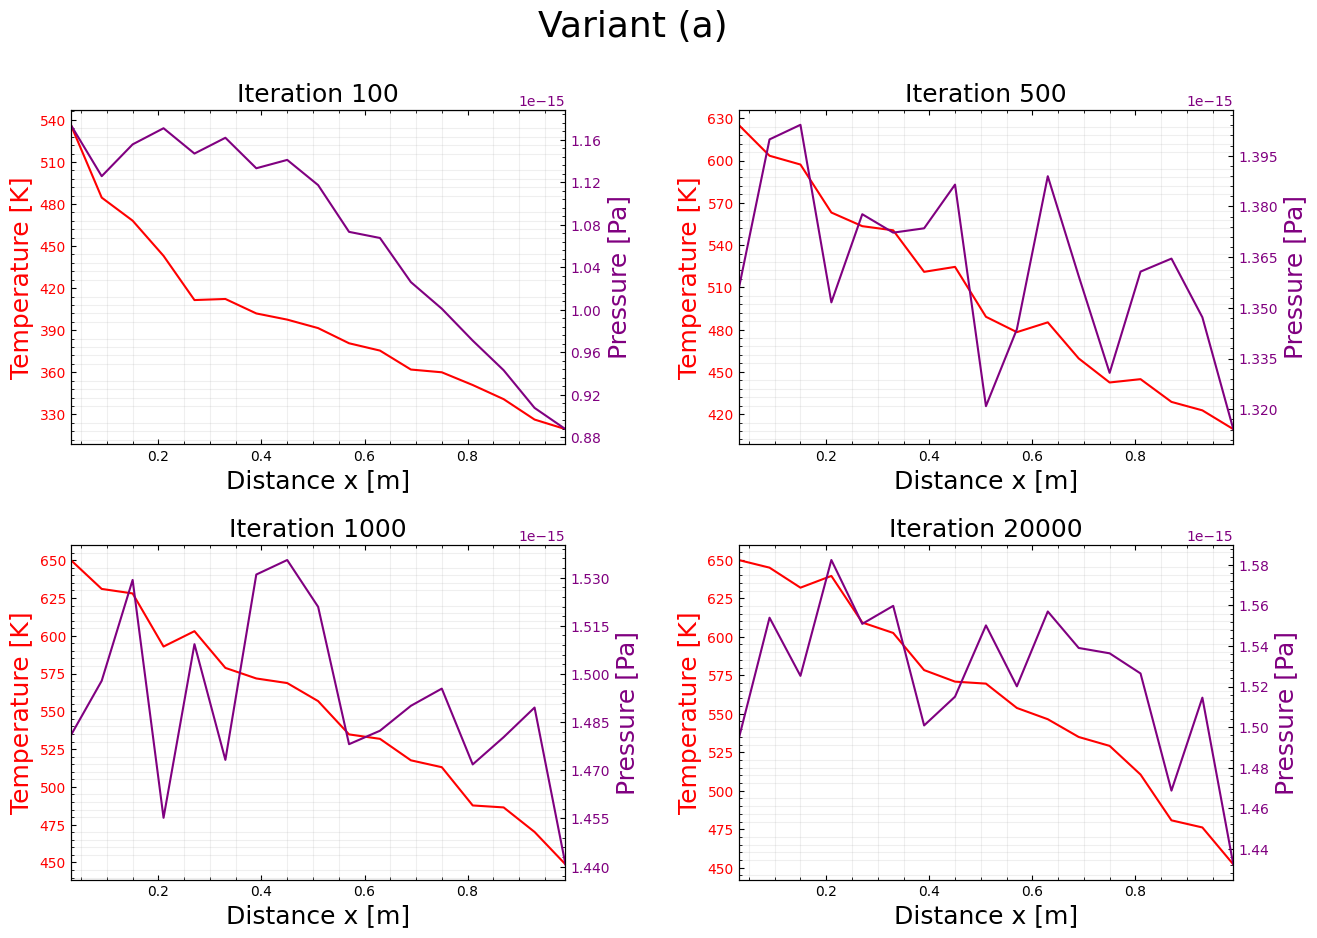

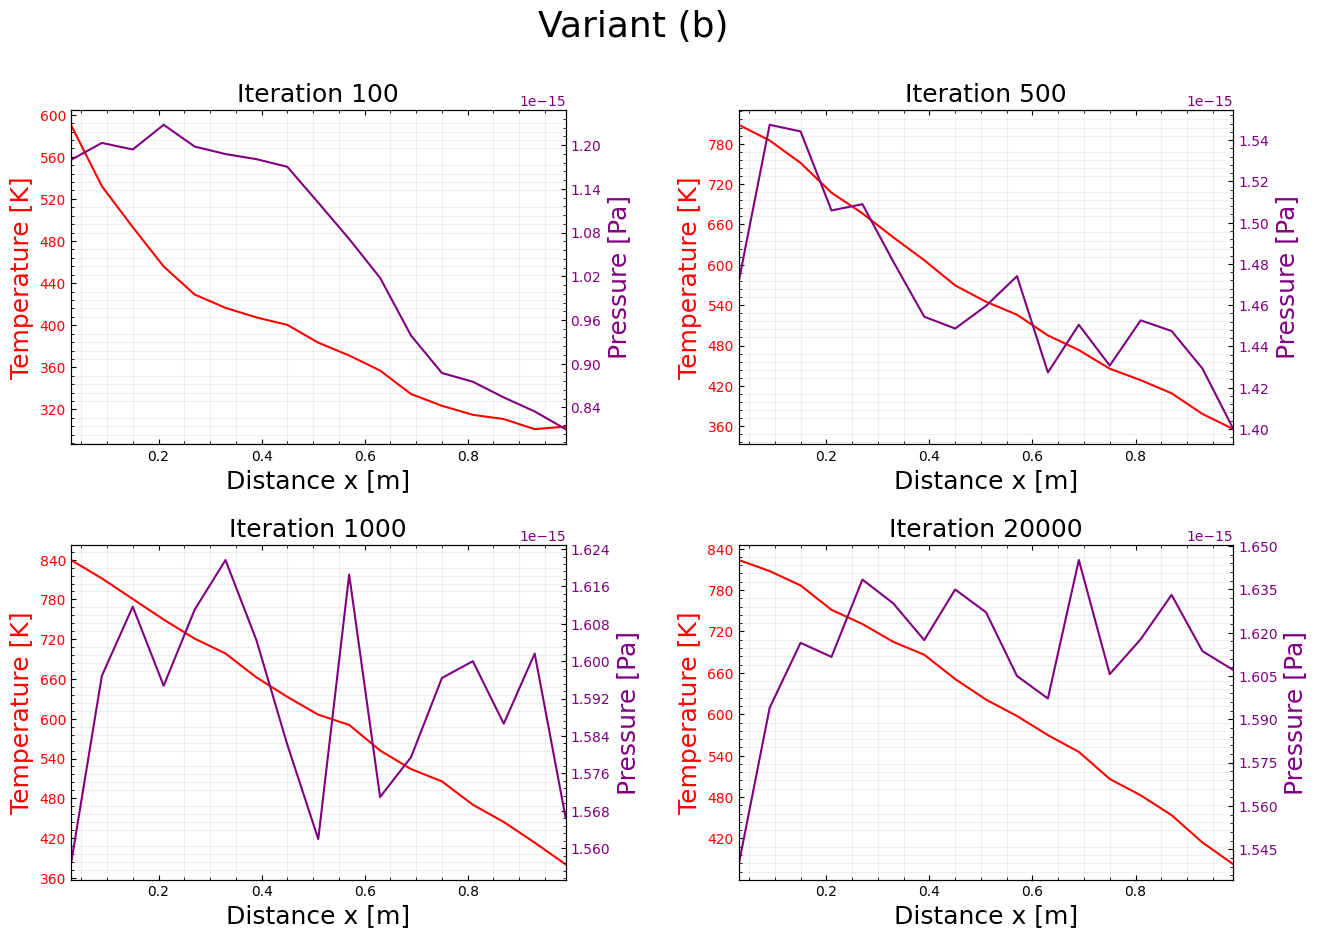

In [127]:
for zad in [4]:
    for podp in ["a", "b"]:
        j=1
        fig, axs = plt.subplots(2, 2, figsize=([15,10]))
        title = "Variant (" + podp + ")"
        fig.suptitle(title, fontsize = 26)
        its=[100, 500, 1000, 20000]
        for a in range(4):
            i = its[a]
            ax = axs[a//2, a%2]
            file = "zad" + str(zad) + podp + "/wyniki/nptv_" + str(i) + ".dat"
            nptv = np.loadtxt(file, dtype=float)
            x = nptv[:,0]
            pres = nptv[:,2]
            temp = nptv[:,3]
            vel = nptv[:,4]
            graph = t_p_plot(x, temp, pres, i, ax)
            j += 1
        plt.subplots_adjust(hspace=0.3, wspace=0.35)
        name = "zad-" + str(zad) + "_var-" + str(podp) + ".png"
        plt.savefig(name, dpi=300)
        plt.show()

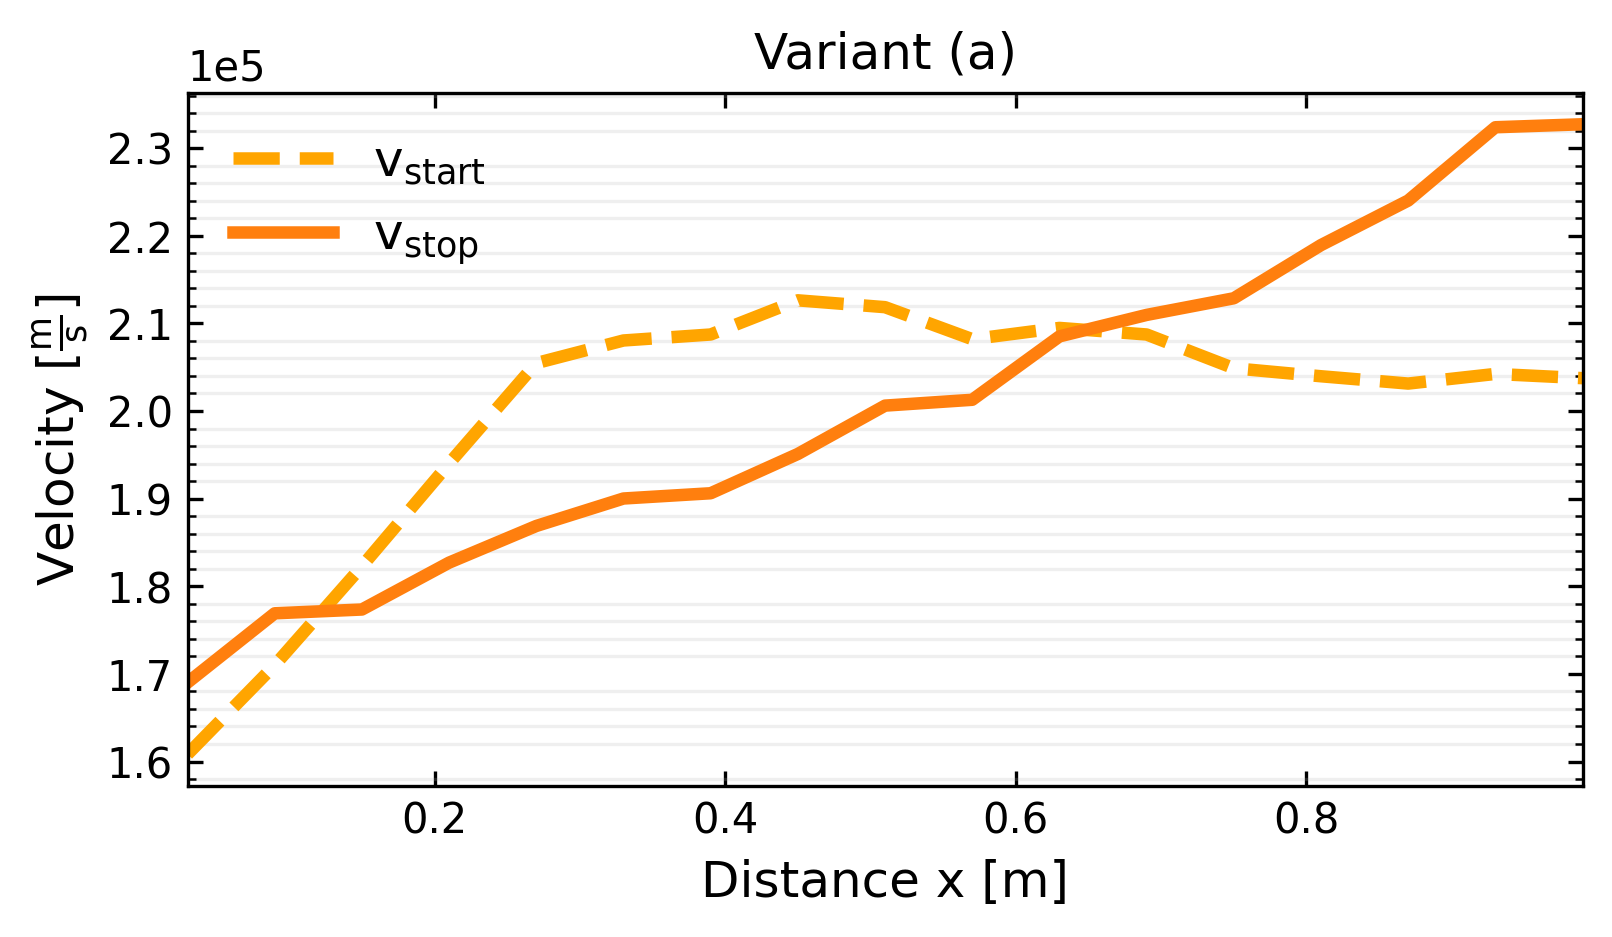

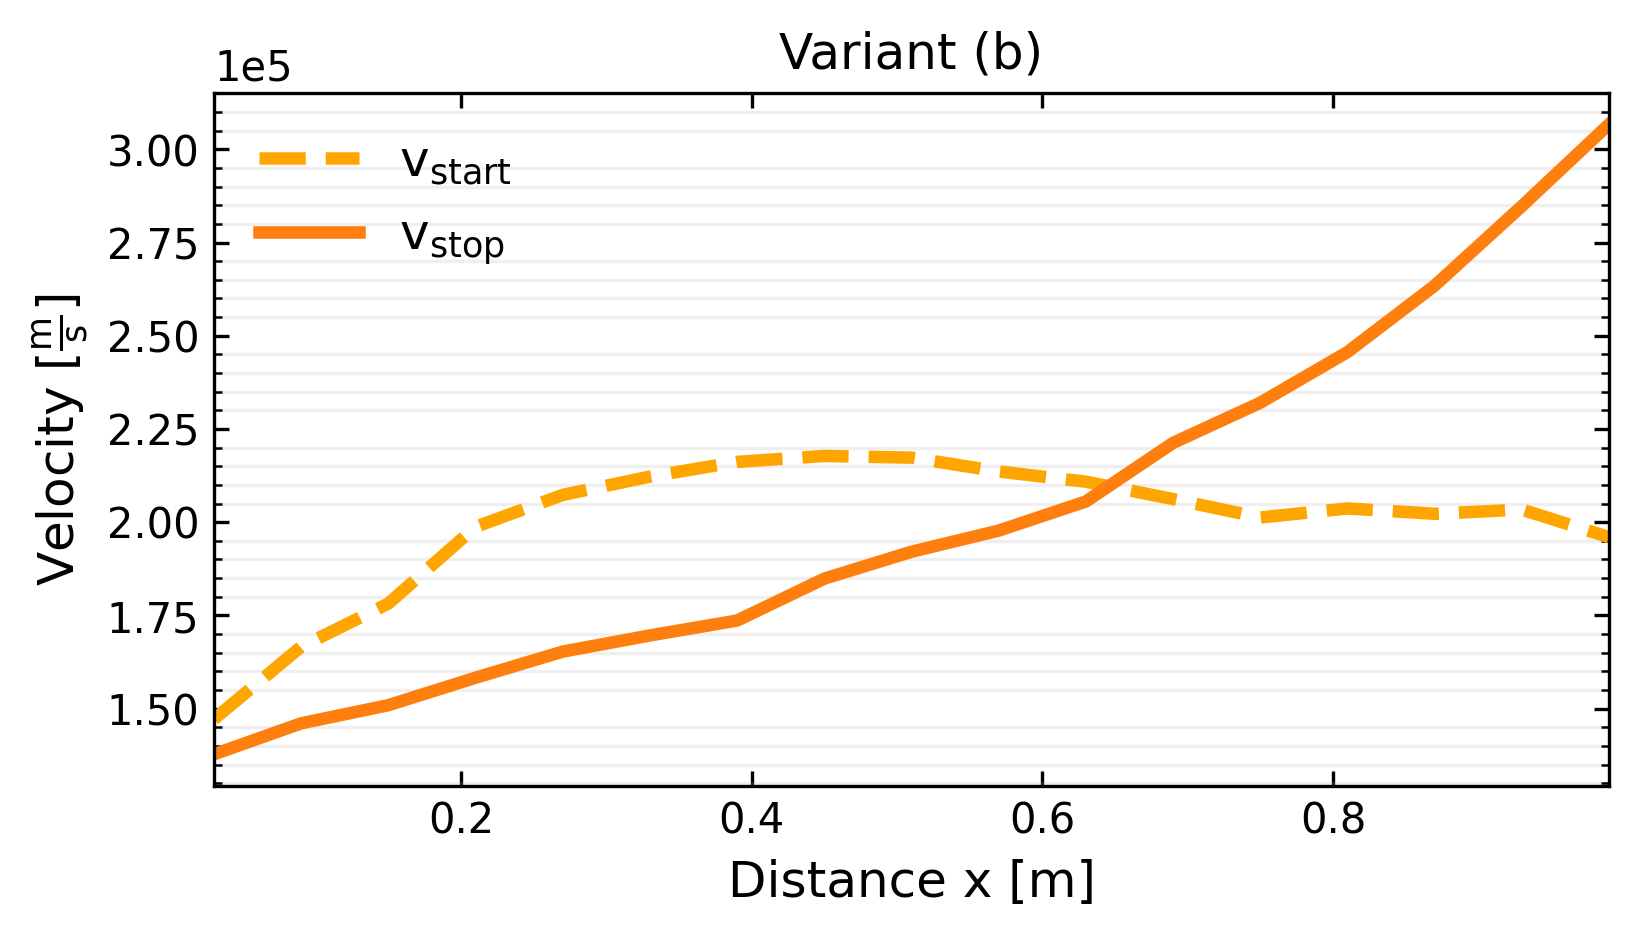

In [129]:
for zad in [4]:
    for podp in ["a", "b"]:
        file = "zad" + str(zad) + podp + "/wyniki/nptv_" + str(100) + ".dat"
        nptv = np.loadtxt(file, dtype=float)
        x = nptv[:,0]
        v0 = nptv[:,1]
        file = "zad" + str(zad) + podp + "/wyniki/nptv_" + str(20000) + ".dat"
        nptv = np.loadtxt(file, dtype=float)
        vk= nptv[:,1]

        text_size = 12
        plt.figure(figsize=([6,3]), dpi=300)
        ax = plt.subplot()

        color1 = "orange"
        color2 = "tab:orange"

        ax.plot(x, v0, "--", linewidth=3, color=color1, label = r'v$_{\text{start}}$')
        ax.plot(x, vk, linewidth=3, color=color2, label = r'v$_{\text{stop}}$')
        ax.legend(frameon=False, fontsize = text_size)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.set_xlabel(r"Distance x [m]", fontsize = text_size)
        ax.set_ylabel(r"Velocity [$\frac{\text{m}}{\text{s}}$]", fontsize = text_size)
        ax.tick_params(direction="in", which="both", top=True, right=True)
        ax.grid(True, which="minor", alpha=0.2)
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.set_xlim([min(hist[:,0]), max(hist[:,0])])
        title = "Variant (" + podp + ")"
        ax.set_title(title, fontsize = text_size)
        name = "zad-" + str(zad) + "_var-" + str(podp) + "_velo.png"
        plt.savefig(name, dpi=300)
        plt.show()